### Data description

The data files are associated with the contest with the title "Beijing Multi-Site Air Quality Data" published at the following website. https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data

The goal is to predict the PM 2.5 levels in the air to determine the Air quality of Beijing. There are multiple datasets concerning different districts in Beijing. The data was recorded hourly for each district.Throughout, missing values have been filled as NaNs.

This data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. The time period is from March 1st, 2013 to February 28th, 2017. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn

In [2]:
#Load all the files and create merged dataset

aotiz = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv",sep = ',')
chang = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv",sep = ',')
ding = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv",sep = ',')
dongsi = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv",sep = ',')
guan = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv",sep = ',')
guch = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv",sep = ',')
huai = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv",sep = ',')
nong = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv",sep = ',')
shun = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv",sep = ',')
tian = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv",sep = ',')
wanl = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv",sep = ',')
wansh = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv",sep = ',')

#Create Merged dataset
Beijing_data = pd.concat([aotiz,chang,ding,dongsi,guan,guch,huai,nong,shun,tian,wanl,wansh])
Beijing_data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [3]:
#Rename the columns
Beijing_data.rename(columns={'wd':'wind_direction','DEWP':'dew_point_temp','TEMP':'temp','RAIN':'rain','WSPM':'wind_speed','PRES':'pressure'},inplace=True)

In [4]:
##Removing 'No' column, as it is not relevant.
Beijing_data.drop('No',axis = 1,inplace= True)
Beijing_data.head(3)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,temp,pressure,dew_point_temp,rain,wind_direction,wind_speed,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin


In [5]:
##Remvoing Null values
print("Null values:\n\n",Beijing_data.isnull().sum())
Beijing_data = Beijing_data.dropna()
print("\nNull values:\n\n",Beijing_data.isnull().sum())

Null values:

 year                  0
month                 0
day                   0
hour                  0
PM2.5              8739
PM10               6449
SO2                9021
NO2               12116
CO                20701
O3                13277
temp                398
pressure            393
dew_point_temp      403
rain                390
wind_direction     1822
wind_speed          318
station               0
dtype: int64

Null values:

 year              0
month             0
day               0
hour              0
PM2.5             0
PM10              0
SO2               0
NO2               0
CO                0
O3                0
temp              0
pressure          0
dew_point_temp    0
rain              0
wind_direction    0
wind_speed        0
station           0
dtype: int64


In [6]:
#Finding and Removing Outliers

print("Shape of dataframe before removing outliers",Beijing_data.shape)

Q1=Beijing_data['PM2.5'].quantile(0.25)
Q3=Beijing_data['PM2.5'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR

Beijing_data = Beijing_data[Beijing_data['PM2.5'] < Upper_Whisker]

print("\nShape of dataframe after removing outliers",Beijing_data.shape)

Shape of dataframe before removing outliers (382168, 17)

Shape of dataframe after removing outliers (364530, 17)


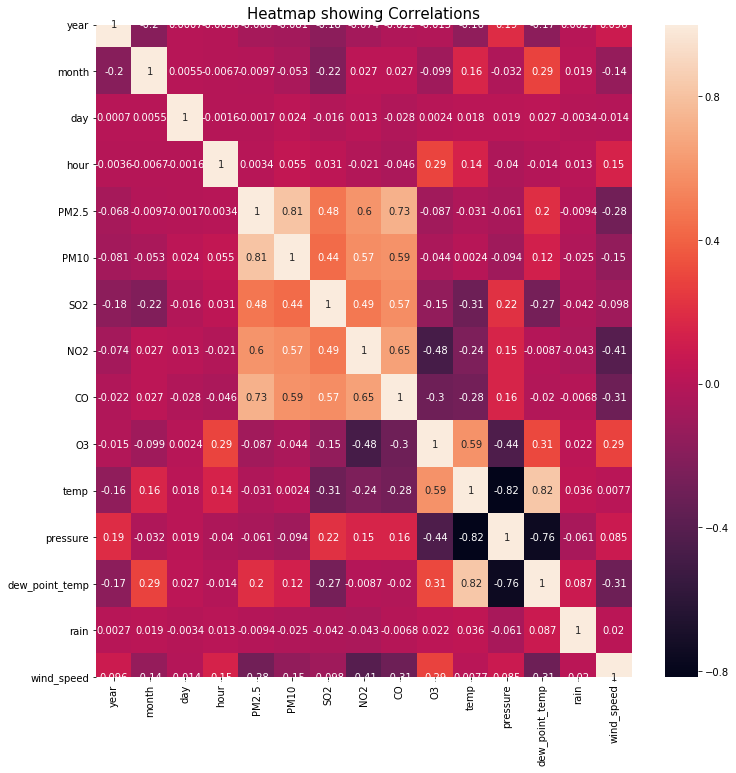

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,temp,pressure,dew_point_temp,rain,wind_speed
year,1.000000,-0.196608,0.000699,-0.003634,-0.067853,-0.081147,-0.177079,-0.074031,-0.022368,-0.015145,-0.160064,0.194084,-0.173126,0.002723,0.095953
month,-0.196608,1.000000,0.005470,-0.006703,-0.009710,-0.052645,-0.222189,0.027210,0.027471,-0.098508,0.157869,-0.032294,0.288997,0.019005,-0.141346
day,0.000699,0.005470,1.000000,-0.001561,-0.001656,0.024023,-0.016099,0.012602,-0.027957,0.002432,0.017609,0.019336,0.027367,-0.003365,-0.013888
hour,-0.003634,-0.006703,-0.001561,1.000000,0.003389,0.054668,0.030637,-0.021393,-0.046292,0.293156,0.144785,-0.040456,-0.013915,0.012643,0.145387
PM2.5,-0.067853,-0.009710,-0.001656,0.003389,1.000000,0.813325,0.475314,0.599683,0.725650,-0.087263,-0.030621,-0.061453,0.201574,-0.009401,-0.284347
PM10,-0.081147,-0.052645,0.024023,0.054668,0.813325,1.000000,0.436685,0.567941,0.588701,-0.043521,0.002397,-0.094086,0.124271,-0.024572,-0.154815
SO2,-0.177079,-0.222189,-0.016099,0.030637,0.475314,0.436685,1.000000,0.487368,0.570594,-0.152469,-0.311588,0.218245,-0.270391,-0.041938,-0.097561
NO2,-0.074031,0.027210,0.012602,-0.021393,0.599683,0.567941,0.487368,1.000000,0.654736,-0.477032,-0.237389,0.152550,-0.008747,-0.042891,-0.406580
CO,-0.022368,0.027471,-0.027957,-0.046292,0.725650,0.588701,0.570594,0.654736,1.000000,-0.301151,-0.279743,0.155417,-0.020302,-0.006809,-0.311955
O3,-0.015145,-0.098508,0.002432,0.293156,-0.087263,-0.043521,-0.152469,-0.477032,-0.301151,1.000000,0.589145,-0.441562,0.310388,0.021577,0.288214


In [7]:
#Checking correlations between the independent variables.

plt.figure(figsize=(12,12))
sns.heatmap(Beijing_data.corr(),annot=True)
plt.title('Heatmap showing Correlations',size=15)
plt.show()

Beijing_data.corr()

In [8]:
#Creating subset of 10% of the dataset
Beijing_sample = Beijing_data.sample(frac =.10) 
print(Beijing_sample.shape)

(36453, 17)


       year  month  day  hour  PM2.5  PM10   SO2   NO2      CO     O3  \
1751   2013      5   12    23  162.0  83.0  13.0  49.0   100.0   58.0   
30407  2016      8   18    23   59.0  59.0   2.0  46.0  2400.0   10.0   
22238  2015      9   13    14   13.0  26.0   2.0  28.0   300.0  103.0   

       dew_point_temp  rain wind_direction  wind_speed    station  
1751             -1.6   0.0            ESE         2.2  Changping  
30407            22.4   0.0            ENE         0.6    Tiantan  
22238             9.9   0.0            SSW         1.6     Wanliu  


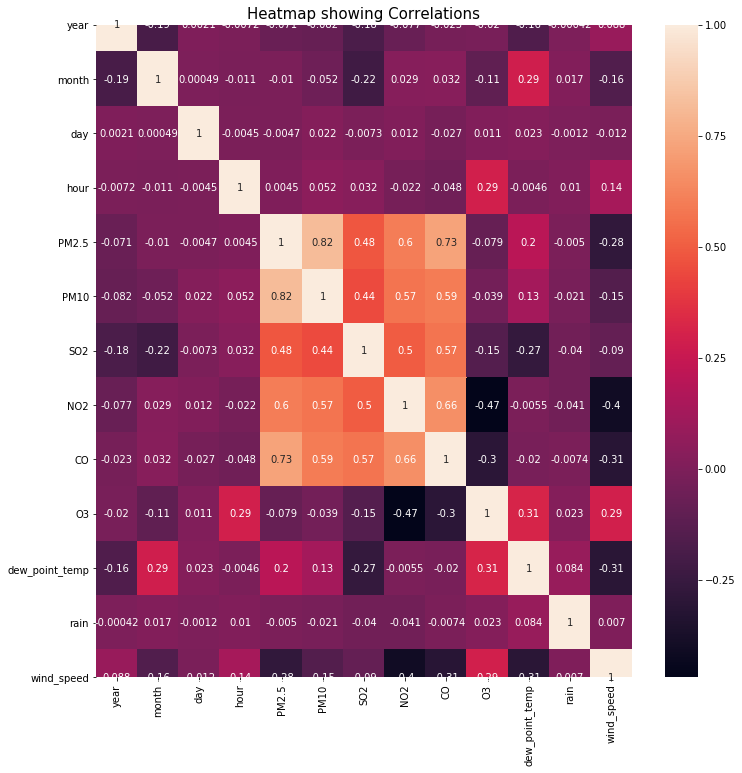

In [9]:
#Temp is highly correlated with pressure and dew_point_temp as the correlation coefficient is more than 0.8.
#So removing Temp. Also removing pressure since it is also highly correlated with dew_point_temp.

Beijing_sample.drop(['temp','pressure'],axis = 1,inplace= True)
print(Beijing_sample.head(3))

plt.figure(figsize=(12,12))
sns.heatmap(Beijing_sample.corr(),annot=True)
plt.title('Heatmap showing Correlations',size=15)
plt.show()

In [10]:
#Reindexing to have target variable(PM2.5) at the last in the column index
Beijing_sample = Beijing_sample.reindex(columns = ['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO',
       'O3','dew_point_temp', 'rain', 'wind_direction',
       'wind_speed', 'station', 'PM2.5'])
Beijing_sample.head(2)

,year,month,day,hour,PM10,SO2,NO2,CO,O3,dew_point_temp,rain,wind_direction,wind_speed,station,PM2.5
1751,2013,5,12,23,83.0,13.0,49.0,100.0,58.0,-1.6,0.0,ESE,2.2,Changping,162.0
30407,2016,8,18,23,59.0,2.0,46.0,2400.0,10.0,22.4,0.0,ENE,0.6,Tiantan,59.0


In [11]:
from sklearn.model_selection import train_test_split

X=Beijing_sample[['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO','O3','dew_point_temp', 'rain', 'wind_direction','wind_speed', 'station']]
y=Beijing_sample['PM2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=0, stratify=Beijing_sample[['station']])

In [12]:
#Encoding the categorical features and Standardizing the numerical features 
#Using ColumnTransformer which will use OneHotEncoder for categorical attributes and StandardScaler for numerical attributes.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_attr = ["PM10","SO2","NO2","CO","O3","dew_point_temp","rain","wind_speed"]
cat_attr = ["station","wind_direction"]

full_pipeline = ColumnTransformer([
 ("num", StandardScaler(), num_attr),
 ("cat", OneHotEncoder(), cat_attr),
 ])
X_train_tr = full_pipeline.fit_transform(X_train)
X_test_tr = full_pipeline.transform(X_test)

print(X_train_tr.shape)
print(X_test_tr.shape)

(29162, 36)
(7291, 36)


Below is another way to implement encoding and standardization using OneHotEncoder() and StandardScaler directly().

In [ ]:
# Another way to implement encoding and standardization using OneHotEncoder() and StandardScaler directly().

# X_train_num = X_train[["PM10","SO2","NO2","CO","O3","dew_point_temp","rain","wind_speed"]]
# X_train_cat = X_train[["station","wind_direction"]]

# X_test_num = X_test[["PM10","SO2","NO2","CO","O3","dew_point_temp","rain","wind_speed"]]
# X_test_cat = X_test[["station","wind_direction"]]

# print(type(X_train_cat))

# #Encoding categorical feature 'station'
# cat_encoder = OneHotEncoder()
# X_train_enc = cat_encoder.fit_transform(X_train_cat)
# X_test_enc = cat_encoder.transform(X_test_cat)
# X_train_enc = X_train_enc.toarray()

# print(type(X_train_enc))
# print(X_train_enc)

# #Standardizing the numerical features
# sc = StandardScaler()
# X_train_std = sc.fit_transform(X_train_num)
# X_test_std = sc.transform(X_test_num)
# print(type(X_train_std))
# print(X_test_std)

# X_train_merge = np.concatenate([X_train_std, X_train_enc], axis =1)
# print('\n')
# print(X_train_merge)

# print(X_train_enc.shape)
# print(X_train_std.shape)
# print(type(X_train_merge))
# print(X_train_merge.shape)

In [13]:
#Building a stochastic gradient descent regressor and training the model
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train_tr, y_train)
y_pred_train = sgd.predict(X_train_tr)

In [14]:
#Predicting using model and evaluating model using RMSE, MAE and R-squared

from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_test = sgd.predict(X_test_tr)

Mse_train = mean_squared_error(y_train, y_pred_train)
Rmse_train = np.sqrt(Mse_train)
print("Root Mean Square Error for training set is ",Rmse_train)

Mse_test = mean_squared_error(y_test, y_pred_test)
Rmse_test = np.sqrt(Mse_test)
print("\nRoot Mean Square Error for test set is ",Rmse_test)

Mae_train = mean_absolute_error(y_train, y_pred_train)
Mae_test = mean_absolute_error(y_test, y_pred_test)
print("\nMean Absolute Error for training set is ",Mae_train)
print("\nMean Absolute Error for test set is ",Mae_test)

r_squared_train = sgd.score(X_train_tr, y_train)
r_squared_test = sgd.score(X_test_tr, y_test)
print("\nR-squared for training set is ",r_squared_train)
print("\nR-squared for test set is ",r_squared_test)

Root Mean Square Error for training set is  26.991112373521485

Root Mean Square Error for test set is  26.80015534159783

Mean Absolute Error for training set is  18.810217029696044

Mean Absolute Error for test set is  18.544645693719612

R-squared for training set is  0.7862428192465374

R-squared for test set is  0.7871508748803135


##### The evaluation metrics used to evaluate the model are Root Mean Square Error, Mean Absolute Error and R-squared. I am using these metrics because these are suitable to be used for regression models. R-Square measures how much of variability in dependent variable is being explained by the model. RMSE and MAE are different ways to measure the error of a model. 

In [17]:
#Hyper-parameters tuning in SGD using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

print("The Different hyperparameters in SGDRegressor along with their current values are:\n\n",sgd.get_params())

parameters = {'average': [True, False],
              'alpha':[0.0001,0.001,0.01,0.1],
              'loss': ['squared_loss','huber'],
              'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'penalty':['l2'],
              'eta0':[0.001,0.01,0.1]
             }

search = RandomizedSearchCV(estimator=sgd, param_distributions = parameters, cv = 3, n_iter = 10, n_jobs=-1)

result = search.fit(X_train_tr, y_train)

# summarize result
print(" \nResults from Randomized Search:\n" )
print('Best Score: %s' % result.best_score_)
print('\nBest Hyperparameters: %s' % result.best_params_)

The Different hyperparameters in SGDRegressor along with their current values are:

 {'alpha': 0.0001, 'average': True, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.1, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'huber', 'max_iter': 5000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
 
Results from Randomized Search:

Best Score: 0.7854473331404874

Best Hyperparameters: {'penalty': 'l2', 'loss': 'squared_loss', 'learning_rate': 'invscaling', 'eta0': 0.01, 'average': False, 'alpha': 0.001}


##### Above mentioned are the different hyper-parameters in SGDRegressor which can be changed to fine tune the model. Out of all these parameters I am tuning the parameters average, alpha, loss, learning_rate, penalty, eta0 and max_iterations. 
##### I have used RandomizedSearchCV to find out the best parameter values as suited for the model. The best hyperparameters value returned by RandomizedSearchCV are mentioned in the output above.  I have run the model specifying these best hyper-parameter values in the below block of code.

In [18]:
sgd = SGDRegressor(random_state=42, alpha= 0.001, average=False, learning_rate= 'invscaling',
                   max_iter=5000, eta0=0.01, loss= 'squared_loss',penalty= 'l2')
sgd.fit(X_train_tr, y_train)
y_pred_train = sgd.predict(X_train_tr)
y_pred_test = sgd.predict(X_test_tr)

Mse_train = mean_squared_error(y_train, y_pred_train)
Rmse_train = np.sqrt(Mse_train)
print("Root Mean Square Error for training set is ",Rmse_train)

Mse_test = mean_squared_error(y_test, y_pred_test)
Rmse_test = np.sqrt(Mse_test)
print("\nRoot Mean Square Error for test set is ",Rmse_test)

Mae_train = mean_absolute_error(y_train, y_pred_train)
Mae_test = mean_absolute_error(y_test, y_pred_test)
print("\nMean Absolute Error for training set is ",Mae_train)
print("\nMean Absolute Error for test set is ",Mae_test)

r_squared_train = sgd.score(X_train_tr, y_train)
r_squared_test = sgd.score(X_test_tr, y_test)
print("\nR-squared for training set is ",r_squared_train)
print("\nR-squared for test set is ",r_squared_test)

Root Mean Square Error for training set is  26.99531899510057

Root Mean Square Error for test set is  26.804071636595513

Mean Absolute Error for training set is  18.79981633819739

Mean Absolute Error for test set is  18.528053620696504

R-squared for training set is  0.7861761850428368

R-squared for test set is  0.7870886632357407
